In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
import os
os.getcwd()

'E:\\4 SNU\\PYTHON ML FILES'

In [30]:
os.chdir('E:/4 SNU/PYTHON ML FILES')

In [31]:
os.getcwd()

'E:\\4 SNU\\PYTHON ML FILES'

In [32]:
data = pd.read_csv('data_cleaned.csv')
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [33]:
data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [34]:
x = data.drop(['Survived'], axis = 1)
y = data['Survived']

In [35]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

In [36]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 96, stratify = y)

In [37]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [38]:
clf = KNN(n_neighbors = 2)
clf.fit(train_x, train_y)

train_predict = clf.predict(train_x)
k = f1_score(train_predict, train_y)
print('Train F1 Score ',k)

test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test F1 Score', k)

Train F1 Score  0.8046511627906977
Test F1 Score 0.5957446808510638


In [39]:
def F1Score(k):
    train_f1 = []
    test_f1 = []
    
    for i in k:
        clf = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        tmp = clf.predict(train_x)
        tmp = f1_score(tmp, train_y)
        train_f1.append(tmp)
        
        tmp = clf.predict(test_x)
        tmp = f1_score(tmp, test_y)
        test_f1.append(tmp)
    return train_f1, test_f1

In [45]:
k = range(1,150)

In [46]:
train_f1, test_f1 = F1Score(k)

In [47]:
score = pd.DataFrame({'train score': train_f1, 'test score': test_f1}, index = k)
score

,train score,test score
1,0.976654,0.701149
2,0.804651,0.595745
3,0.820926,0.708075
4,0.773034,0.628571
5,0.771784,0.675497
...,...,...
145,0.552632,0.517241
146,0.552632,0.517241
147,0.552632,0.517241
148,0.552632,0.517241


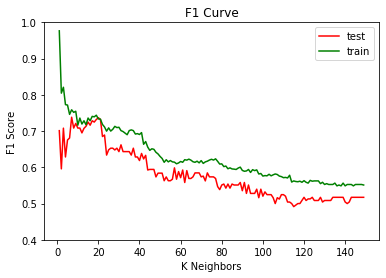

In [48]:
plt.plot(k, test_f1, color = 'red', label = 'test')
plt.plot(k, train_f1, color = 'green', label = 'train')
plt.xlabel('K Neighbors')
plt.ylabel('F1 Score')
plt.title('F1 Curve')
plt.ylim(0.4,1)
plt.legend()
